# Abundance plots - Decay and Stable

The notebook contains plots for mass fraction, production factor and comparision plots. It also can be configured to produce decayed and stable elements only.

This can be done for multiple ppn data sets, by defining the path in cell 1. Examples are given.

These choices are made in True/False statements at the begining of the relevent cells.

Ensure that your nugridpy directory has a PYTHONPATH to it and LaTeX is intalled

In [7]:
% matplotlib nbagg
from nugridpy import ppn as p
      
# read ppn runs, more can be added here with p.abu_vector("X") defining their location
t1 = p.abu_vector('../NuPPN/frames/ppn/ti44tom/traj1/')
t2 = p.abu_vector('../NuPPN/frames/ppn/ti44tom/traj2/')
t3 = p.abu_vector('../NuPPN/frames/ppn/ti44tom/traj3/')
t4 = p.abu_vector('../NuPPN/frames/ppn/ti44tom/traj4/')
t5 = p.abu_vector('../NuPPN/frames/ppn/ti44tom/traj5/')
t6 = p.abu_vector('../NuPPN/frames/ppn/ti44tom/traj6/')
# T90MK = p.abu_vector('../NuPPN/frames/ppn/90MKtest/')


# List of runs imported, with titles for legends
# Ensure that all ppn runs are in the case list below
case = [t1,t2,t3,t4,t5,t6]
case_labels = ['Ti44 Examination, T9=6.3','Ti44 Examination, T9=5.4','Ti44 Examination, T9=4.31',\
              'Ti44 Examination, T9=3.7','Ti44 Examination, T9=2.75','Ti44 Examination, T9=2.5',]

#Case shift allows for choosing the runs to plot
#case_shift = [1,1,1,1,1,1,1,1,1,1,1]
if len(case) != len(case_labels):
    print "ENSURE CASE AND LABELS ARE THE SAME LENGTH"

226 cycle numbers found in ../NuPPN/frames/ppn/ti44tom/traj1/
Ranging from 00000 to 00225
Range may not be continuous. To display all available cycles, print <abu_vector_instance>.files
226 cycle numbers found in ../NuPPN/frames/ppn/ti44tom/traj2/
Ranging from 00000 to 00225
Range may not be continuous. To display all available cycles, print <abu_vector_instance>.files
226 cycle numbers found in ../NuPPN/frames/ppn/ti44tom/traj3/
Ranging from 00000 to 00225
Range may not be continuous. To display all available cycles, print <abu_vector_instance>.files
226 cycle numbers found in ../NuPPN/frames/ppn/ti44tom/traj4/
Ranging from 00000 to 00225
Range may not be continuous. To display all available cycles, print <abu_vector_instance>.files
226 cycle numbers found in ../NuPPN/frames/ppn/ti44tom/traj5/
Ranging from 00000 to 00225
Range may not be continuous. To display all available cycles, print <abu_vector_instance>.files
226 cycle numbers found in ../NuPPN/frames/ppn/ti44tom/traj6/
Ranging 

Abundance reading

In [8]:
# read abundances for a cycle
# name species
abund_label=[]
for i in case:
    abund_label.append(i.dcols[4])

# simplified case. Take the last step, or apply the needed shift 
select_last_step = True

# here you get the last cycle
if select_last_step:
    case_shift = [1,1,1,1,1,1,1,1,1,1,1]
    step_I_want = []
    j=0
    for i in case:
        step_I_want.append(len(i.files)-case_shift[j])
        j=j+1

# get initial abundances of first case, assuming that 
# different cases share the same initial abundances. 
all_abundances=[]
all_abundances.append(case[0].get(abund_label[0],0))

j=0
for i in case:
    all_abundances.append(i.get(abund_label[j],step_I_want[j]))
    j=j+1


### Data preparation - decayed abundances

Solar data must be placed in the same directory as the notebook. Solar data sets are found in the NuPPN/frames/mppnp/USEEPP directory.

In [9]:
from nugridpy import utils as u

# get isotope names
isotope_names=[]
j=0
for i in case:
    name_dum=[]
    for ii in i.get(i.dcols[5],step_I_want[j]):
        name_dum.append(ii)
    isotope_names.append(name_dum)
    j=j+1

# this is just to convert neut name in something readable....
j=0
for i in case:
    for jj in range(len(isotope_names[j])):
        if isotope_names[j][jj] == 'NEUT':
            isotope_names[j][jj] = 'NN-1'
            break
    j=j+1

    
# reading solar data
solar_factor = 1.
u.solar('../NuPPN/frames/mppnp/USEEPP/iniab2.0E-02GN93.ppn',solar_factor)


j=0
isotope_name_spe=[]
number_spe = []
all_decayed=[]
index_for_all_abundances=[]
index_for_all_decayed=[]
stable_isotope_identifier=[]
stable_isotope_list=[]
isotopic_production_factors=[]
isotopic_production_factors_decayed=[]
for i in case:
    #Conver h5 files into the stadard ppn/mppnp file format
    u.convert_specie_naming_from_h5_to_ppn(isotope_names[j])
    #Specie naming list
    isotope_name_spe.append(u.spe)
    #numer array, same length as u.spe [1088]
    number_spe.append(u.n_array)
    u.define_zip_index_for_species(isotope_name_spe[j],number_spe[j])
    index_for_all_abundances.append(u.cl)
    u.stable_specie()
    index_for_all_decayed.append(u.back_ind)
    stable_isotope_identifier.append(u.jjdum)
    stable_isotope_list.append(u.stable)
    # here I am doing what decay() does in mppnp.py
    # we could introduce in ppn.py, or move decay in utils?
    # need to check possible inconsistencies. See with Falk.
    decayed_dum=[]
    for ii in range(len(u.decay_raw)):
        if u.jdum[ii] > 0.5:
            jj=jj+1
            dummy=0.
            for jjj in range(len(u.decay_raw[ii])):
                try:
                    dum_str = u.decay_raw[ii][jjj]
                    dummy = dummy + float(all_abundances[j+1][index_for_all_abundances[j][dum_str.lower().capitalize()]])
                    #print cl[dum_str.lower().capitalize()]		
                    #print dum_str, mass_frac[iii][cl[dum_str.capitalize()]]
                except KeyError:
                    None
                    #print 'I am not in the network:',decay_raw[i][j]
                except IndexError:
                    None
                    #print 'I am not read',cl[decay_raw[i][j].lower().capitalize()],decay_raw[i][j]
            decayed_dum.append(dummy) 
    all_decayed.append(decayed_dum)
    #
    # now I am doing what get_abundance_iso_decay is doing in mppnp.
    # I am calculating production factors. 
    #
    pf_dum=[]
    jj=0
    for k in range(len(stable_isotope_identifier[j])):
        if stable_isotope_identifier[j][k] == 1:
            pf_dum.append(float(all_abundances[j+1][index_for_all_abundances[j][stable_isotope_list[j][jj]\
                                    .capitalize()]]/u.solar_abundance[stable_isotope_list[j][jj].lower()]))
            jj=jj+1
    isotopic_production_factors.append(pf_dum)
    pf_dum_d=[]
    jj=0
    for k in range(len(stable_isotope_identifier[j])):
        if stable_isotope_identifier[j][k] == 1:
            pf_dum_d.append(float(all_decayed[j][index_for_all_decayed[j][stable_isotope_list[j][jj].upper()]]\
                                  /u.solar_abundance[stable_isotope_list[j][jj].lower()]))
            jj=jj+1
    isotopic_production_factors_decayed.append(pf_dum_d)
    j=j+1

This initial abundance file uses an element name that does
not contain the mass number in the 3rd to 5th position.
It is assumed that this is the proton and we will change
the name to 'h   1' to be consistent with the notation used in
iniab.dat files


## Isotopic distribution plots

### Plotting config

Here the parameters used in the plots are outlined.

The choice to plot decayed or only stable values are found here as i_want_... boolean values

In [10]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
%matplotlib inline
from matplotlib.ticker import MultipleLocator

I_want_decayed = True
I_want_only_stable = True

# some general input for the plots
fig = plt.figure()            # Figure object
ax = fig.add_subplot(1,1,1)     # Axes object: one row, one column, first plot (one plot!)
# font to be used
plt.rc('font',family='Helvetica')
 # set plotting parameters
figsize = (10,8)
params = {'axes.labelsize':  6,
          'figure.figsize': figsize,
          'font.size':       10,
          'legend.fontsize': 15,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'text.usetex': True}
# plt.figure(figsize=(10,10))

plt.rcParams.update(params)

xminorlocator = plt.MultipleLocator(1)
xmajorlocator = plt.MultipleLocator(10)
ax.xaxis.set_major_locator(xmajorlocator)
ax.xaxis.set_minor_locator(xminorlocator)
yminorlocator = plt.MultipleLocator(0.1)
ymajorlocator = plt.MultipleLocator(0.2)
ax.yaxis.set_major_locator(ymajorlocator)
ax.yaxis.set_minor_locator(yminorlocator)
ax.set_yscale('log')
symbols=["bs", "gD","ro", "yD",'r^','m>','cs']
linestyle=['bo-','g+--','r*-.','y>-','rs--','m^-','c^-.']
plt.close()

### Production factors plot



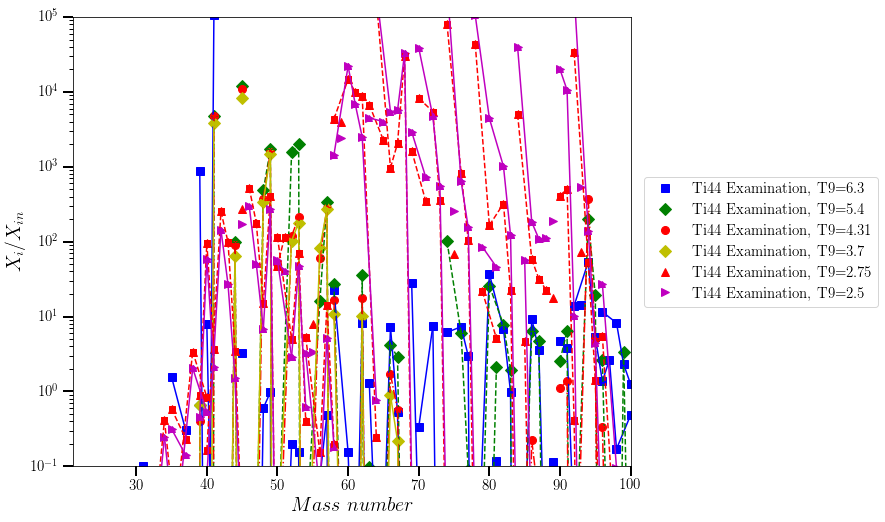

In [22]:
if I_want_decayed:
    production_factors=isotopic_production_factors_decayed
else:
    production_factors=isotopic_production_factors
if I_want_only_stable:
    j=0
    for i in case:
        for jj in range(len(stable_isotope_list[j])):
            plt.plot(i.get('A',step_I_want[j])[index_for_all_abundances[j]\
                [stable_isotope_list[j][jj].capitalize()]],production_factors[j]\
                [index_for_all_decayed[j][stable_isotope_list[j][jj].upper()]],\
                symbols[j],markersize=8.)
        j=j+1
    j=0
    for i in case:
        for ii in range(len(stable_isotope_list[j])):
            for jj in range(len(stable_isotope_list[j])): 
                if stable_isotope_list[j][ii][:2] == stable_isotope_list[j][jj][:2]:
                    if stable_isotope_list[j][ii] == stable_isotope_list[j][jj-1]:
                        adum=[i.get('A',step_I_want[j])[index_for_all_abundances[j]\
                            [stable_isotope_list[j][ii].capitalize()]],\
                            i.get('A',step_I_want[j])[index_for_all_abundances[j]\
                            [stable_isotope_list[j][jj].capitalize()]]]
                        #print adum,'adum'	
                        mfdum =[float(production_factors[j][index_for_all_decayed[j]\
                            [stable_isotope_list[j][ii].upper()]]),\
                            float(production_factors[j][index_for_all_decayed[j]\
                            [stable_isotope_list[j][jj].upper()]])]
                        #print mfdum,'mfdum'
                        plt.plot(adum,mfdum,linestyle[j])
        j=j+1
j=0
for i in case:
    plt.plot(1e-99,1e-99,symbols[j],markersize=8.,label=case_labels[j])
    j += 1
#     hfont = {'fontname':'Times New Roman'}
plt.xlabel('$Mass$ $number$', fontsize=20)#, **hfont)
#plt.ylabel('$X_{i}/X_{sun}$', fontsize=20)
plt.ylabel('$X_{i}/X_{in}$', fontsize=20)#, **hfont)	
plt.legend(loc='right',borderaxespad=-16.5)
plt.ylim(1e-1,1e5)
plt.xlim(21,100)
plt.yscale('log')
plt.tick_params(which='major',length=10, width=2)
plt.tick_params(which='minor',length=4, width=1)
plt.gcf().subplots_adjust(bottom=0.1)
#gcf().subplots_adjust(left=0.15)
# plt.grid()
plt.show() 

### Mass fraction plot

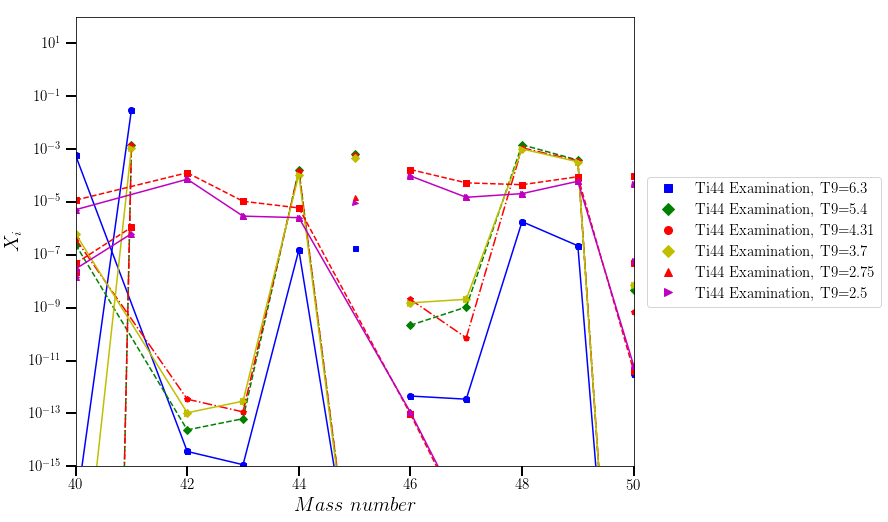

In [23]:
if I_want_decayed:
    all_abu_plot = all_decayed
else:
    all_abu_plot = all_abundances[1:]

if I_want_only_stable:
    j=0
    for i in case:
        for jj in range(len(stable_isotope_list[j])):
            plt.plot(i.get('A',step_I_want[j])[index_for_all_abundances[j]\
                    [stable_isotope_list[j][jj].capitalize()]],\
                    all_abu_plot[j][index_for_all_decayed[j]\
                    [stable_isotope_list[j][jj].upper()]],symbols[j],markersize=5.)
        j=j+1

    j=0
    for i in case:
        for ii in range(len(stable_isotope_list[j])):
            for jj in range(len(stable_isotope_list[j])): 
                if stable_isotope_list[j][ii][:2] == stable_isotope_list[j][jj][:2]:
                    if stable_isotope_list[j][ii] == stable_isotope_list[j][jj-1]:
                        adum=[i.get('A',step_I_want[j])[index_for_all_abundances[j]\
                            [stable_isotope_list[j][ii].capitalize()]],\
                            i.get('A',step_I_want[j])[index_for_all_abundances[j]\
                            [stable_isotope_list[j][jj].capitalize()]]]
                        mfdum =[float(all_abu_plot[j][index_for_all_decayed[j]\
                            [stable_isotope_list[j][ii].upper()]]),\
                            float(all_abu_plot[j][index_for_all_decayed[j]\
                            [stable_isotope_list[j][jj].upper()]])]
#                             print adum
                        plt.plot(adum,mfdum,linestyle[j])
        j=j+1
else:
    j=0
    for i in case:
        plt.plot(i.get('A',step_I_want[j]),all_abu_plot[j],symbols[j],markersize=8.)
        j=j+1

j=0
for i in case:
    plt.plot(1e-99,1e-99,symbols[j],markersize=8.,label=case_labels[j])
    j += 1
plt.xlabel('$Mass$ $number$', fontsize=20)
plt.ylabel('$X_{i}$', fontsize=20)
plt.ylim(1.0e-15,1.0e2)
plt.xlim(40,50)
plt.legend(loc='right',borderaxespad=-16.5)
plt.yscale('log')
plt.tick_params(which='major',length=10, width=2)
plt.tick_params(which='minor',length=4, width=1)
plt.gcf().subplots_adjust(bottom=0.1)
#gcf().subplots_adjust(left=0.15)
# plt.grid()
plt.show() 

### Comparison plot

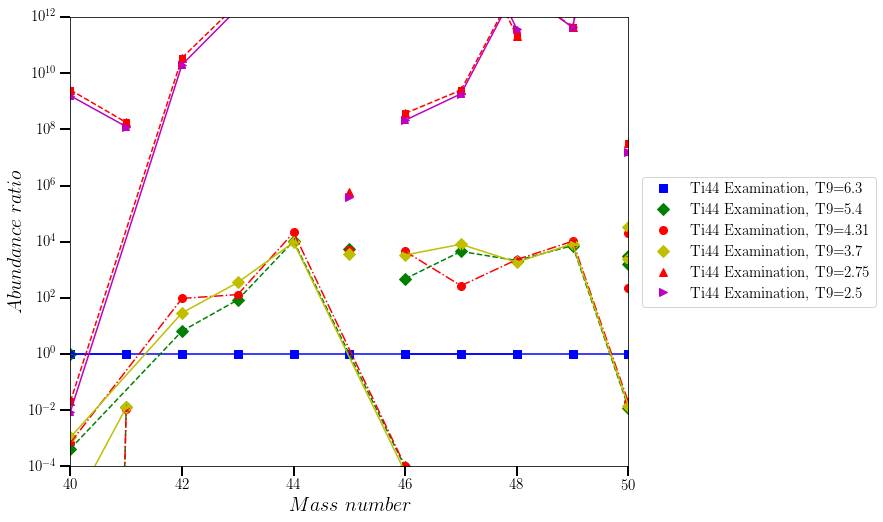

In [24]:
distribution_ratio=[]
j=0
for i in case:
    distribution_ratio.append(all_abundances[j+1]/all_abundances[1])
    j=j+1

if I_want_only_stable:
    j=0
    for i in case:
        for jj in range(len(stable_isotope_list[j])):
            plt.plot(i.get('A',step_I_want[j])[index_for_all_abundances[j]\
                [stable_isotope_list[j][jj].capitalize()]],\
                distribution_ratio[j][index_for_all_abundances[j]\
                [stable_isotope_list[j][jj].capitalize()]],symbols[j],markersize=8.)
        j=j+1

    j=0
    for i in case:
        for ii in range(len(stable_isotope_list[j])):
            for jj in range(len(stable_isotope_list[j])):
                if stable_isotope_list[j][ii][:2] == stable_isotope_list[j][jj][:2]:
                    if stable_isotope_list[j][ii] == stable_isotope_list[j][jj-1]:
                        adum=[i.get('A',step_I_want[j])[index_for_all_abundances[j]\
                            [stable_isotope_list[j][ii].capitalize()]],\
                            i.get('A',step_I_want[j])[index_for_all_abundances[j]\
                            [stable_isotope_list[j][jj].capitalize()]]]
                        mfdum=[float(distribution_ratio[j][index_for_all_abundances[j]\
                            [stable_isotope_list[j][ii].capitalize()]]),\
                            float(distribution_ratio[j][index_for_all_abundances[j]\
                            [stable_isotope_list[j][jj].capitalize()]])]
#                             print mfdum
                        plt.plot(adum,mfdum,linestyle[j])
        j=j+1
else:
    j=0
    for i in case:
        plt.plot(i.get('A',step_I_want[j]),distribution_ratio[j],symbols[j],\
                 markersize=8.)
        j=j+1
j=0
for i in case:
    plt.plot(1e-99,1e-99,symbols[j],markersize=8.,label=case_labels[j])
    j += 1
#     hfont = {'fontname':'Times New Roman'}
plt.xlabel('$Mass$ $number$', fontsize=20)#, **hfont)
plt.ylabel('$Abundance$ $ratio$', fontsize=20)#, **hfont)

plt.ylim(1e-4,1e12)
plt.xlim(40,50)
plt.legend(loc='right',borderaxespad=-16.5)
plt.yscale('log')
plt.tick_params(which='major',length=10, width=2)
plt.tick_params(which='minor',length=4, width=1)
plt.gcf().subplots_adjust(bottom=0.1)
# plt.grid()
plt.show() 

#### Get elemental abundances, decayed and undecayed

This is generated per case value

In [25]:
element_abundance_not_decayed=[]
element_abundance_decayed =[]
element_production_factors=[]
element_production_factors_decayed=[]
z_of_element_name = []
j=0
for i in case:
        u.give_zip_element_z_and_names(isotope_name_spe[j])
        z_of_element_name.append(u.index_z_for_elements)
        u.element_abund_marco(2,stable_isotope_list[j],stable_isotope_identifier[j],\
                              all_abundances[j+1],all_decayed[j])
        element_abundance_not_decayed.append(u.elem_abund)
        element_abundance_decayed.append(u.elem_abund_decayed)
        element_production_factors.append(u.elem_prod_fac)
        element_production_factors_decayed.append(u.elem_prod_fac_decayed)
        u.give_zip_element_z_and_names(i.elements_names)
        z_of_element_name.append(u.index_z_for_elements)      
        j=j+1

## Abundance plots

Here the multiple cases input into the notebook can be compared.

Again by usin the I_want... boolean values a specific graph can be produced

Elemental markers can be generated with the element_x lists (lines 46,47)

/Users/thomaslawson/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in log10


(5, 42)

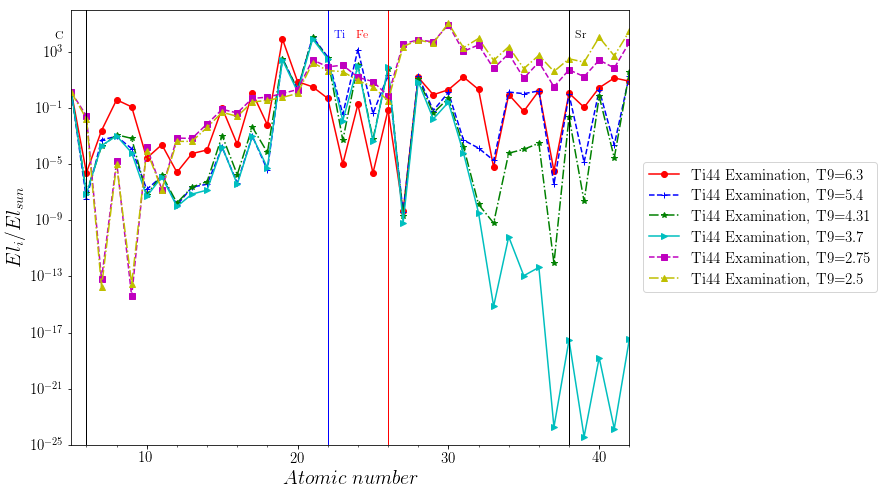

In [32]:
# make some plot of element abundances
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import math

# specify here what do you want to plot
I_want_comparison_plot = False  # not active for element abundance 
I_want_mass_fractions_plot = False
I_want_production_factors_plot = True
I_want_decayed = True
I_want_only_stable = True
# some general input for the plots

fig = plt.figure()            # Figure object
ax = fig.add_subplot(1,1,1)     # Axes object: one row, one column, first plot (one plot!)
# Tick marks
xminorlocator = plt.MultipleLocator(2)
xmajorlocator = plt.MultipleLocator(10)
ax.xaxis.set_major_locator(xmajorlocator)
ax.xaxis.set_minor_locator(xminorlocator)
yminorlocator = plt.MultipleLocator(0.05)
ymajorlocator = plt.MultipleLocator(0.1)
ax.yaxis.set_major_locator(ymajorlocator)
ax.yaxis.set_minor_locator(yminorlocator)
ax.set_yscale('log')

symbol = ['ro-','b+--','g*-.','c>-','ms--','y^-.','g^-','g^--','k^-.']
j=0
if I_want_production_factors_plot:
    for ii in case:
        plt.semilogy(u.z_for_elem,element_production_factors_decayed[j],symbol[j],\
                     ms=6.,label=case_labels[j])
        j=j+1
elif I_want_mass_fractions_plot:
    for ii in case:
        plt.semilogy(u.z_for_elem,element_abundance_decayed[j],symbol[j],\
                     ms=6.,label=case_labels[j])
        j=j+1


# plt.legend(loc='lower left')
plt.legend(loc='right',borderaxespad=-16.5)

x_upper_limit = 42
element_names  = ['C','Ti','Fe','Sr','Pd','Ag','Ba','Eu','W','Re','Pb']
element_z_list = [6  ,22  ,26  ,38  ,46  ,47  ,56  ,63  ,74 ,75  ,82]
colours = ['k','b','r']
location_y =  1e4
j=0
for i in element_z_list:
    if i <= x_upper_limit:
        plt.axvline(x=i,lw=1,color=colours[j%len(colours)])
        if j % 2 == 0:
            plt.text(i-2.1,location_y,element_names[j],fontsize='large',color=colours[j%len(colours)])
        else:
            plt.text(i+0.4,location_y,element_names[j],fontsize='large',color=colours[j%len(colours)])
    j = j+1

plt.xlabel('$Atomic$ $number$', fontsize=20)
plt.ylabel('$El_{i}/El_{sun}$', fontsize=20)
# plt.ylabel('$El_{i}$', fontsize=20)

y_limit_max = math.ceil(np.log10(np.max(element_production_factors_decayed)))
y_limit_min = math.floor(np.log10(np.min(element_production_factors_decayed)))

# plt.ylim(10**(y_limit_min),\
plt.ylim(1e-25,\
         10**(y_limit_max))
#plt.ylim(1.e-15,1.5)
plt.xlim(5,x_upper_limit)